Since our model has so bad accuracy on N36-2 (sandflat), Dirk find the section is at the transition between chaanel and sandflat after checking it's description and location. He then gives more sandflat sections to test our model. However,  these sections are similar to N36-2 instead of the sections for training. We'll see how it goes...

Meanwhile, let's see how similarity is between the facies.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Investigate facies similarity
I use the whole clr-transformed XRF data without further feature engineering as the data. Then take the mean and s.d. of each element in each facies to describe the characteristic of facies. The clustering algorithm is agglomerative clustering (ward's).

In [2]:
from wasafacies import PrepareData

prepare = PrepareData()
facies, id_list = prepare.create_recla()
norm_df = prepare.create_raw(facies=facies, id_list=id_list)

In [3]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19016 entries, N13_01061 to N16_02908
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Si            19016 non-null  float64
 1   S             19016 non-null  float64
 2   Cl            19016 non-null  float64
 3   K             19016 non-null  float64
 4   Ca            19016 non-null  float64
 5   Ti            19016 non-null  float64
 6   Fe            19016 non-null  float64
 7   Br            19016 non-null  float64
 8   Rb            19016 non-null  float64
 9   Sr            19016 non-null  float64
 10  Zr            19016 non-null  float64
 11  Ba            19016 non-null  float64
 12  facies        19016 non-null  int64  
 13  core_section  19016 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 2.2+ MB


In [4]:
# the properties in each facies as input
norm_df.groupby('facies').agg(['mean', 'std'])

Si                   S                  Cl                   K  \
            mean       std      mean       std      mean       std      mean   
facies                                                                         
0       2.333496  0.465044 -1.763351  0.607541  1.365479  0.344765  1.671245   
1       1.030692  0.614453 -1.686521  0.511890  1.266718  0.384834  1.664498   
2       0.320269  0.324176 -1.452713  0.362580  0.501810  0.295449  1.677115   
3       2.258174  0.522944 -2.068505  0.701267  0.692776  0.735028  1.996717   
4       0.792222  0.363178 -1.181230  0.575457  0.651266  0.399016  1.756727   
5       0.284368  0.552975 -0.413147  0.574434  0.629507  0.532379  1.757503   
6      -0.528453  1.026163  0.655383  0.863461  1.776580  0.588828  0.866041   
7       1.798776  0.907443 -0.927350  0.732544  0.756192  0.477472  1.888580   
8       1.512493  0.426813 -1.644337  0.939733  0.539714  1.106023  2.382802   
9       2.204532  0.343011 -1.878527  0.727817  1.307560  0.582780  2.189039   

                        Ca            ...        Br                  Rb  \
             std      mean       std  ...      mean       std      mean   
facies                                ...                                 
0       0.394818  3.736943  1.158355  ... -4.790342  1.418852 -1.472818   
1       0.207620  3.004254  0.300742  ... -3.717194  1.550173 -1.517090   
2       0.095715  3.268740  0.168130  ... -2.450080  0.603937 -1.654483   
3       0.277689  2.890965  0.442547  ... -5.128151  1.340729 -1.180225   
4       0.158547  2.769182  0.525156  ... -3.149855  1.223371 -1.610861   
5       0.377250  1.210340  0.494907  ... -1.810689  0.735990 -1.429794   
6       0.432745  2.051421  0.409544  ... -1.157662  1.693841 -2.609153   
7       0.478496  1.425003  0.354739  ... -4.831720  1.594480 -1.317558   
8       0.246080  1.563466  0.578122  ... -5.571723  1.093648 -0.898567   
9       0.290617  1.103629  0.226113  ... -5.361451  1.083783 -0.945403   

                        Sr                  Zr                  Ba            
             std      mean       std      mean       std      mean       std  
facies                                                                        
0       0.652807 -0.186156  0.751426 -0.865249  0.719775 -1.261463  0.552568  
1       0.304665 -0.919790  0.224943 -0.289339  0.594701 -1.502746  0.379091  
2       0.160828 -0.949248  0.142809 -1.012583  0.369579 -2.034639  0.245535  
3       0.331813 -0.740884  0.291120  0.050277  0.605550 -1.161789  0.296748  
4       0.221586 -1.273189  0.364880 -0.561386  0.496525 -1.771080  0.284001  
5       0.362854 -1.750723  0.287829 -1.178404  0.404233 -1.616698  0.218639  
6       1.435710 -1.342608  0.649080 -1.499352  1.510258 -1.201072  0.335046  
7       0.594067 -1.159036  0.321895  0.323835  0.391336 -0.949000  0.359338  
8       0.372420 -0.978283  0.387136  0.057014  0.518696 -0.888433  0.365355  
9       0.349545 -1.022325  0.399779  0.284316  0.463574 -0.713205  0.240179  

[10 rows x 24 columns]

In [5]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [6]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(
    norm_df.groupby('facies').agg(['mean', 'std']).values
)


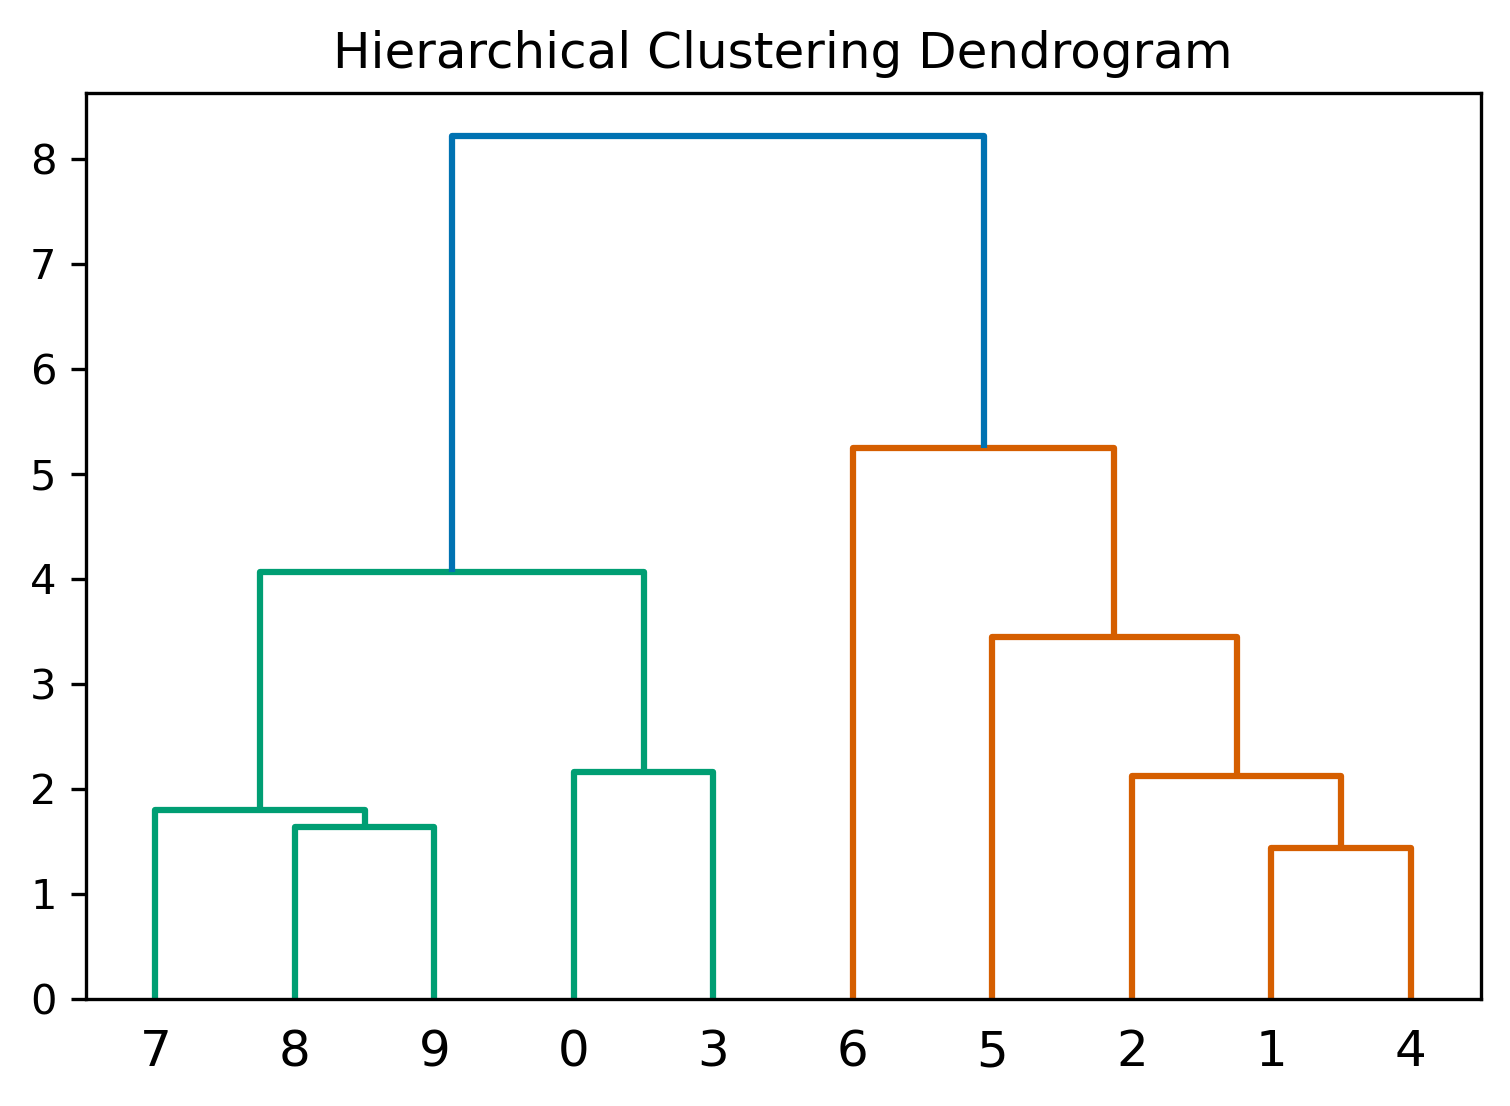

In [7]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)

In [8]:
_, unique = pd.factorize(facies)

In [9]:
xticks = []
for i in [7, 8, 9, 0, 3, 6, 5, 2, 1, 4]:
    xticks.append(unique[i])

xticks

['so', 'pm', 'pef', 'hsm', 'sf', 'pt', 'la', 'lcf', 'hcf', 'mf']

/home/users/aslee/miniconda3/envs/wasafacies/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


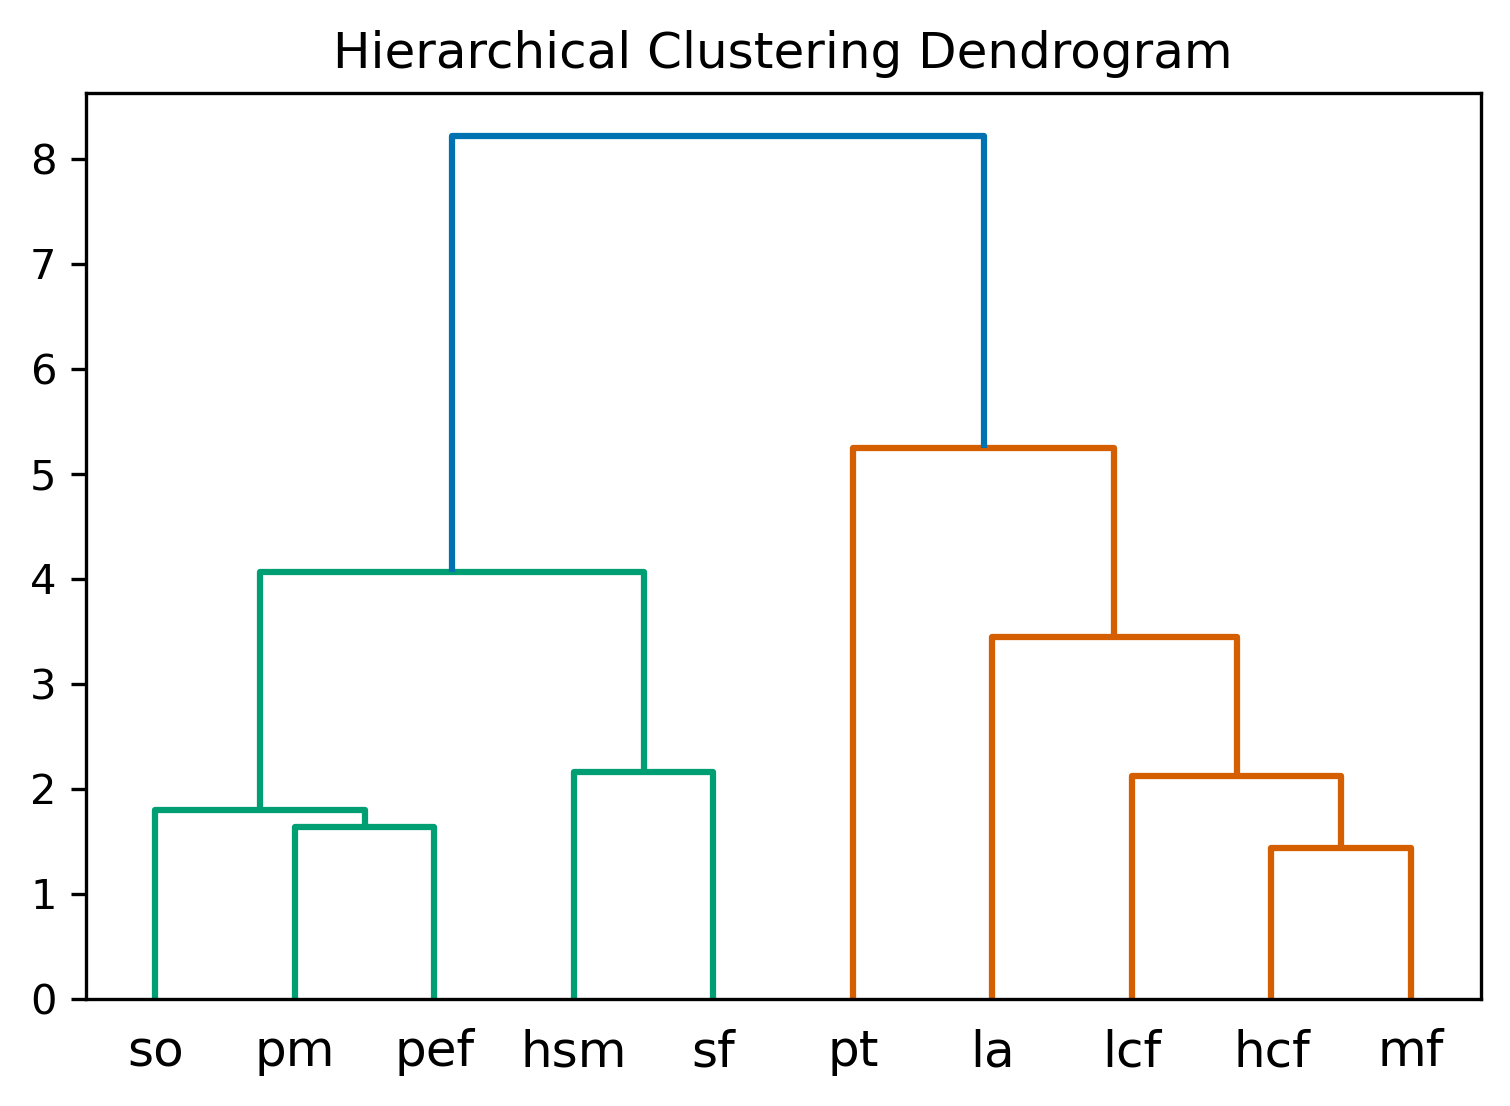

In [23]:
# modify the xticks to actual facies name
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xticks(ticks=plt.axes().get_xticks(), labels=xticks)
plt.savefig('results/facies_similarity_{}.png'.format(date))


# Try the machine on the new sections
These sections are provided by Dirk additionally to see if our machine doing better job other than the section N36-2 in the test set, which happens to be in the transition of sand flat and channel deposits. The best machine is the svc model trained on rolling data, based on `ML_element_15.ipynb`, so the input data need to be transformed into rolling format.

## Create facies and id lists

In [2]:
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0, 
                      usecols=['composite_id', 'core_section', 'section_depth_mm'])

In [23]:
# Generate the new sections' lists
# following the format of the original workflow
n_id_list = []

for sec in ['VC13-2', 'VC03-2', 'N49-3', 'N50-2']:
    mask = info_df.core_section == sec
    n_id_list = np.hstack([n_id_list, info_df.index[mask]])

n_facies = ['sf' for _ in range(len(n_id_list))]

n_id_list

array(['VC13_00641', 'VC13_00643', 'VC13_00645', ..., 'N50_01899',
       'N50_01901', 'N50_01903'], dtype=object)

In [25]:
from wasafacies import PrepareData

prepare = PrepareData()
data_df = prepare.create_roll(facies=n_facies, id_list=n_id_list)
data_df.head()

,Si_mean,S_mean,Cl_mean,K_mean,Ca_mean,Ti_mean,Fe_mean,Br_mean,Rb_mean,Sr_mean,...,Ca_std,Ti_std,Fe_std,Br_std,Rb_std,Sr_std,Zr_std,Ba_std,facies,core_section
composite_id,,,,,,,,,,,,,,,,,,,,,
N49_00019,2.298304,-2.124620,0.985867,1.775768,2.774608,0.787902,1.322361,-4.798421,-1.365727,-0.788097,...,0.613216,0.471229,0.208454,1.312989,0.445170,0.291811,0.290702,0.364468,0,N49-3
N49_00021,2.274825,-2.099204,0.985501,1.756746,2.818019,0.771770,1.319512,-4.931606,-1.269742,-0.797863,...,0.617322,0.470257,0.207166,1.300649,0.286535,0.293135,0.263509,0.371465,0,N49-3
N49_00023,2.258080,-2.102704,0.982133,1.752351,2.891176,0.746146,1.326051,-4.970603,-1.276021,-0.794807,...,0.555045,0.462851,0.199510,1.236544,0.288015,0.289878,0.208134,0.374296,0,N49-3
N49_00025,2.263416,-2.131357,0.989725,1.768837,2.902664,0.780200,1.326998,-4.979463,-1.305469,-0.821961,...,0.546106,0.465630,0.200117,1.242225,0.241089,0.257195,0.202462,0.366667,0,N49-3
N49_00027,2.258578,-2.108752,0.990128,1.780861,2.910453,0.882152,1.345804,-5.168555,-1.335653,-0.791913,...,0.548923,0.428852,0.192926,1.082009,0.291240,0.315590,0.175812,0.354293,0,N49-3


In [12]:
facies, id_list = prepare.create_recla()

The lists of the original workflow are recalled. These are needed to correspond the new faices index to the machine's, which is based on the original workflow

In [16]:
_, unique = pd.factorize(facies)
print(unique)

['hsm' 'hcf' 'lcf' 'sf' 'mf' 'la' 'pt' 'so' 'pm' 'pef']


So the corresponding index of sf is 3.

## Run the machine on those sections

In [6]:
from joblib import load

model = load('models/r_roll_svc_model_20210811.joblib')
y_pred = model.predict(data_df.iloc[:, :-2].values)

In [20]:
# calculate the accuracy
sum(y_pred == 3)/len(y_pred)

0.9000613120784795

Nice accuracy!

## Plot XRF data points of the new and N36-2 sections
This is to see if the shell layers in these sections have XRF data.

In [27]:
check_df = pd.concat([info_df.section_depth_mm, data_df.Fe_mean, data_df.core_section], axis=1, join='inner')
check_df

,section_depth_mm,Fe_mean,core_section
composite_id,,,
N49_00019,19.77,1.322361,N49-3
N49_00021,21.77,1.319512,N49-3
N49_00023,23.77,1.326051,N49-3
N49_00025,25.77,1.326998,N49-3
N49_00027,27.77,1.345804,N49-3
...,...,...,...
VC13_01787,1152.00,1.770856,VC13-2
VC13_01789,1154.00,1.760611,VC13-2
VC13_01791,1156.00,1.759535,VC13-2


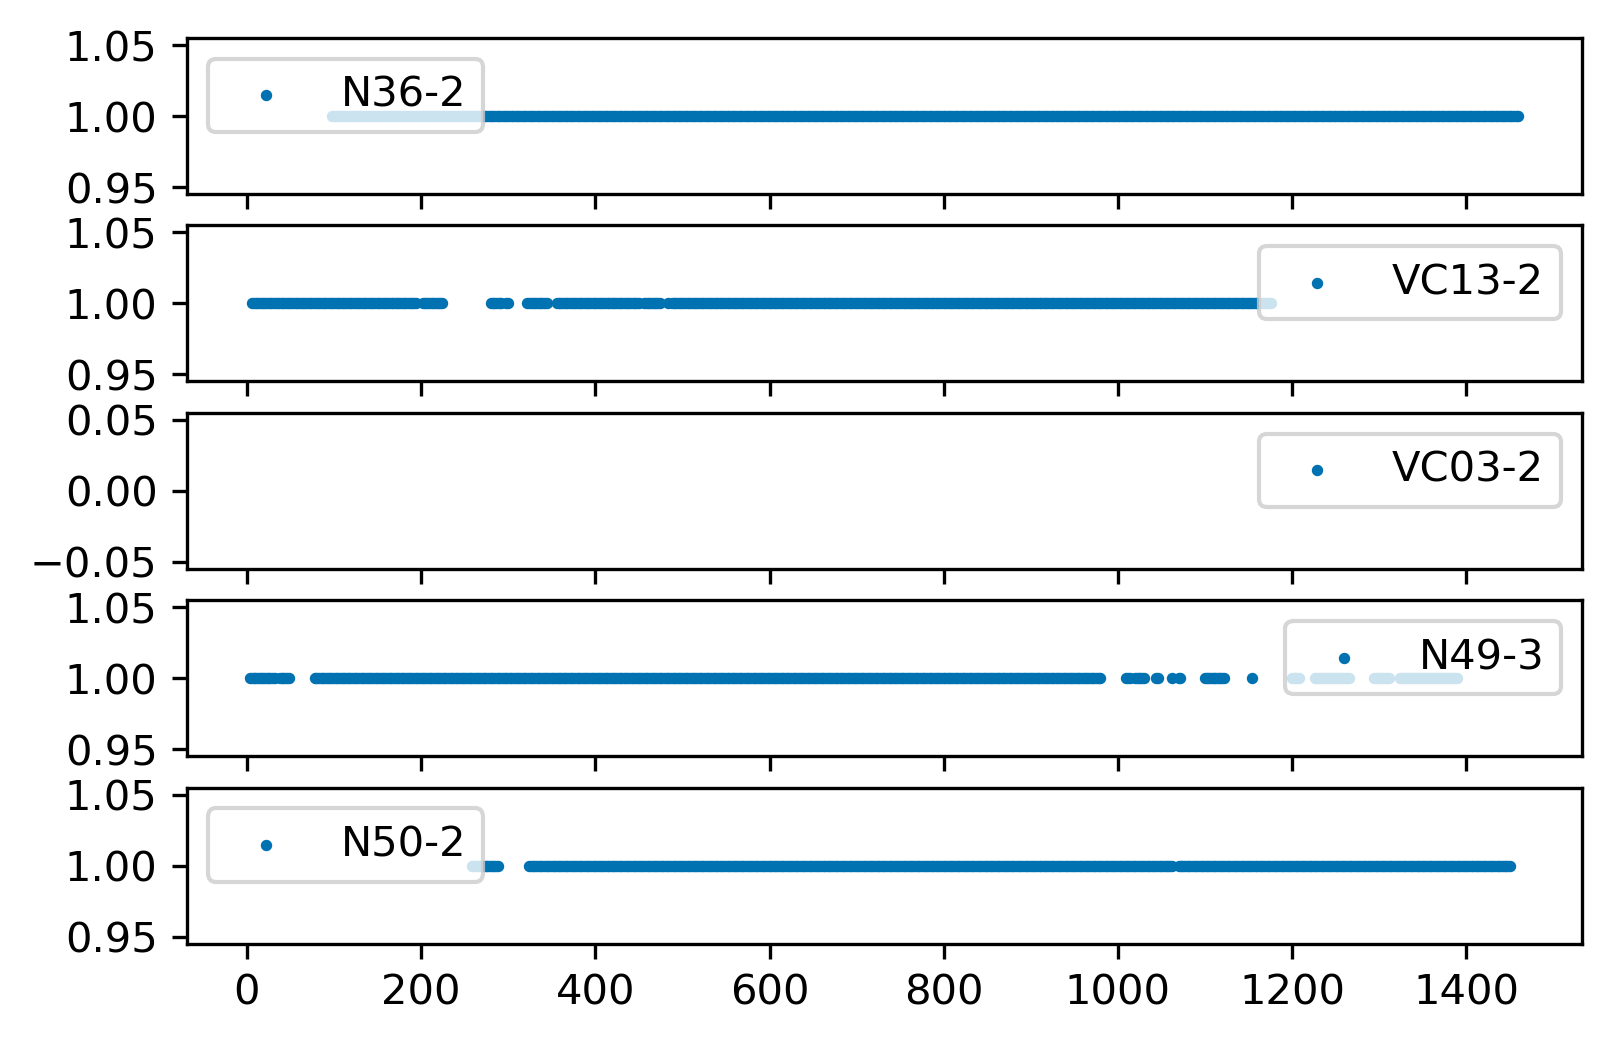

In [36]:
fig, axes = plt.subplots(5, 1, sharex='col')
for sec, ax in zip(['N36-2', 'VC13-2', 'VC03-2', 'N49-3', 'N50-2'], axes):
    mask = info_df.core_section == sec
    ax.scatter(info_df.loc[mask, 'section_depth_mm'], [1 for _ in range(sum(mask))],
        s=3, label=sec
    )
    ax.legend()

Cool, VC03-2 actually doesn't have XRF data at all. 

# Summary
I used the same model that gives the sandflat sediments so bad accuracy in the test set (section N36-2) to test on these addition sections. The overall accuracy is 0.9, which is surprisingly good. This support the idea that N36-2, which is at the transition of sandflat and channel, confuses our machine, which is trained by more typical sandflat sediments. The dendrogram shows that sandflat is similar to the hsm (high energy shallow marine), which supports why N36-2 is mostly misclassified to hsm (see in `ML_element_15.ipynb`, r_roll_svc_sf_mis_20210816.png).  P.S. The rest misclassifications, which are very minor, are hcf (high energy channel fill). hcf is more close to mudflat rather than sandflat…

I’ve compiled the core photos of all sandflat sediments used in our work (training, test and addition) into a PDF (`sandflat-reclassified.pdf`). The shell layers aren’t very essential to our machine because there is no XRF data for them (excluded due to bad quality), except for N36-2 (the shells are quite fragmented so the core surface is actually fine for XRF). Hence in the XRF perspective, the addition sections are similar to the training sections I guess, which supported by the good accuracy. For N36-2, even though the shell layer is counted in the manner of XRF, it shouldn’t be the major issue to cost bad accuracy because the whole section is misclassified, not only the shell layer part. Those sandy part of N36-2 must be also chemically different from the sandy part of the training sections.
